In [ ]:
from crewai import Agent, Task, Crew

In [ ]:
import os
#from utils import get_openai_api_key

#openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'
#Create your own API Key
os.environ["OPENAI_API_KEY"]=""

In [ ]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
	verbose=True
)

- **True:** When allow_delegation is set to True, the agent (in this case, the Content Planner) can assign or delegate parts of its tasks to other agents or entities. This could involve collaborating with other specialized agents to gather information, verify facts, or perform subtasks that contribute to the overall goal of planning content.<br><br>

- **False:** When allow_delegation is set to False, the agent is expected to perform all its assigned tasks independently without delegating any part of its responsibility to other agents or entities. This setting ensures that the agent completes its work on its own, maintaining control and responsibility over the entire process.

In [ ]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True
)

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True
)

In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

In [ ]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

In [ ]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

In [ ]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer: 

Content Plan: 
Title: The Rise of Artificial Intelligence: Trends, Players, and News You Need to Know

Introduction:
- Brief overview of Artificial Intelligence (AI) and its impact on various industries
- Mention of the latest trends in AI development and adoption
- Introduction to key players in the AI industry and their contributions
- Preview of noteworthy news related to AI advancements

Key Points:
1. Latest Trends in AI:
- Rise of explainable AI and ethical considerations
- Increased focus on AI in hea

In [ ]:
from IPython.display import Markdown
Markdown(result)

# The Rise of Artificial Intelligence: Trends, Players, and News You Need to Know

## Introduction
Artificial Intelligence (AI) has become a transformative force in various industries, revolutionizing processes and pushing boundaries. The latest trends in AI development and adoption are reshaping the way we interact with technology and the world around us. Key players in the AI industry are driving innovation and pushing the limits of what is possible with intelligent systems. In this blog post, we will explore the trends, players, and news that are shaping the future of AI.

## Latest Trends in AI
Explainable AI and ethical considerations have taken the forefront in AI development, aiming to make intelligent systems more transparent and accountable. The focus on AI in healthcare and personalized medicine has led to groundbreaking advancements in disease diagnosis and treatment. AI-powered chatbots and virtual assistants are becoming more prevalent, enhancing customer experiences and streamlining communication processes. The expansion of AI applications in autonomous vehicles and smart cities is paving the way for more efficient and sustainable urban environments.

## Key Players in the AI Industry
Google's DeepMind continues to make significant breakthroughs in AI research, pushing the boundaries of what AI can achieve. IBM Watson is revolutionizing healthcare and business analytics, providing insights that were previously unimaginable. Tesla's use of AI in autonomous driving technology is reshaping the automotive industry, setting new standards for safety and efficiency. Microsoft's AI initiatives in cloud computing and productivity tools are empowering businesses to harness the power of intelligent systems for growth and innovation.

## Noteworthy News in AI
Recent AI breakthroughs in natural language processing and image recognition are opening up new possibilities for human-machine interaction and understanding. The impact of AI on job automation and the future of work is a topic of concern and discussion, as industries adapt to the changing landscape of intelligent automation. Ethical implications of AI algorithms and bias in decision-making are prompting conversations about the responsible development and deployment of AI technologies. Collaboration between tech giants and governments to regulate AI development is essential to ensuring that AI is developed and used in a way that benefits society as a whole.

## Conclusion
Artificial Intelligence is continuously evolving, with new trends, players, and news shaping the landscape of intelligent systems. As technology enthusiasts, business professionals, students, and anyone interested in the future of AI, it is crucial to stay informed and engaged with the latest developments in the field. By understanding the trends, players, and news in AI, we can better navigate the opportunities and challenges that come with this transformative technology.

Remember to stay informed about AI trends through industry blogs and news outlets, share your thoughts on AI developments, and join the conversation on social media. Explore resources for further reading on AI ethics, industry applications, and future trends to deepen your understanding and contribute to the ongoing dialogue surrounding Artificial Intelligence.

In [ ]:
from langchain_community.llms import HuggingFaceHub

llm = HuggingFaceHub(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    huggingfacehub_api_token="<HF_TOKEN_HERE>",
    task="text-generation",
)

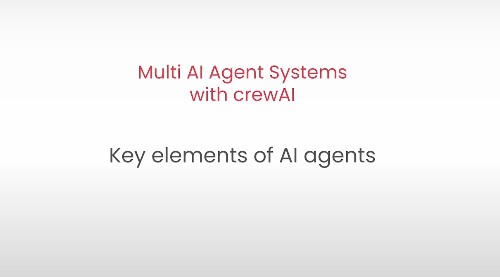

In [ ]:
from IPython.display import Image
Image("/content/multiaiagent.jpg")

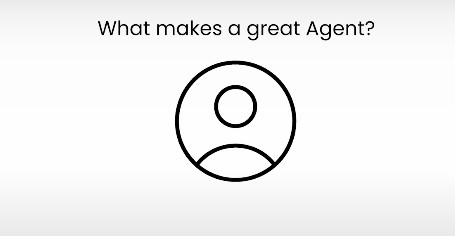

In [ ]:
from IPython.display import Image
Image("/content/greatagent.jpg")

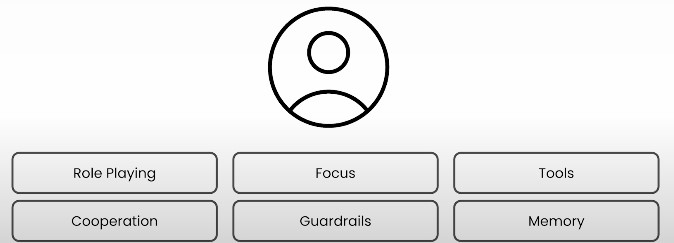

In [ ]:
from IPython.display import Image
Image("/content/componentsagent.jpg")

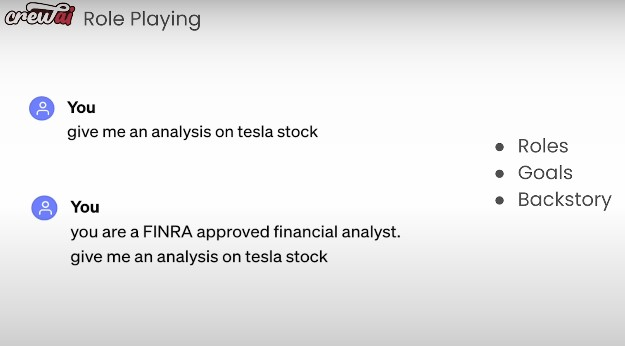

In [ ]:
from IPython.display import Image
Image("/content/roleplaying.jpg")

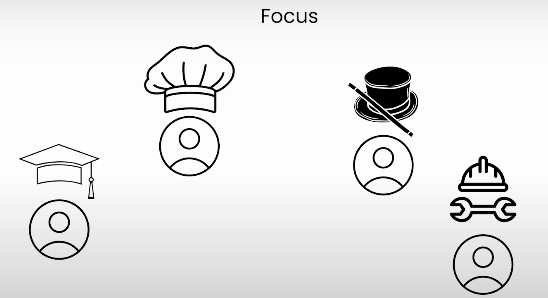

In [ ]:
from IPython.display import Image
Image("/content/focus.jpg")

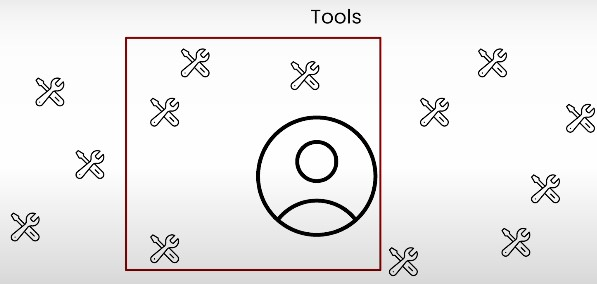

In [ ]:
from IPython.display import Image
Image("/content/tools.jpg")

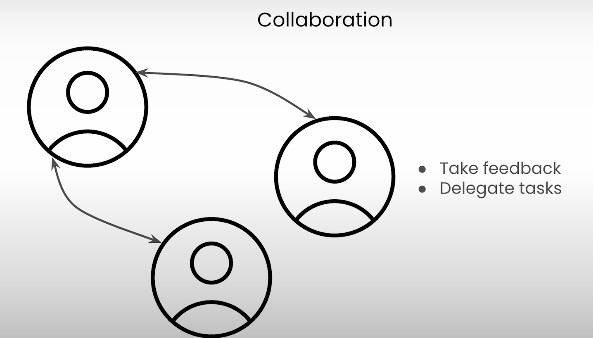

In [ ]:
from IPython.display import Image
Image("/content/collabaration.jpg")

# [Guardrails](https://github.com/guardrails-ai/guardrails)